# 04 - AdaBoost

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [8]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [9]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Initialize AdaBoost classifier with a Decision Tree as the base estimator
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Controls the contribution of each classifier
    random_state=42
)

In [11]:
# Train the model
adaboost_model.fit(X_train, y_train)

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [12]:
# Make predictions
y_pred = adaboost_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# the same result as with the Conventional Algorithm
# (Logistic Regression)


Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       609
           1       0.85      0.68      0.75       443

    accuracy                           0.81      1052
   macro avg       0.82      0.79      0.80      1052
weighted avg       0.82      0.81      0.81      1052



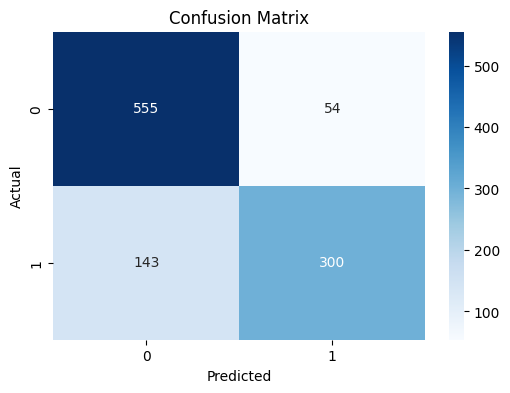

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# and here we have even more mistakes than
# the Logistic Regression showed